<a href="https://colab.research.google.com/github/rautvaishnavi/CODSOFT/blob/main/CodSoft_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hey Everyone !! 🙌🙌

### Excited to share ***`Task 1`*** of CodSoft Data Science Internship

### Titanic Survival Prediction ⚓⚓

### Let's get an overview of the steps Performed :

1. Importing the Important Dependencies
2. Loading the Dataset and Preprocessing
3. Analysis of Dataset
4. Data Visualization
5. Separation of the Features and Targets
6. Split the Data into Training and Testing Data
7. Finding and Training the Model
8. Finally Evaluation of the Model


**Warning are to be ignored** ❗❗❗



**1. Importing the Important Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**2. Loading the Dataset and Preprocessing**

In [ ]:
titanic = pd.read_csv('/content/train.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking for Null values in the Dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's now try to handle and fix these null values

In [ ]:
#Dropping the 'Cabin' column
titanic = titanic.drop(columns='Cabin',axis=1)

In [ ]:
#Since Age Column has some less null values so let's try to replace thoes
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
#Let's now again list the missing values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#Finding which values are repeated most number of times 'Embarked' and repeated
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#As there are only 2 values missing so let's replace these values
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
#Finally checking for the missing values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**3. Analysis of Dataset**

We will try to check the Statistical Data for our analysis

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Visualizing the Data**

In [ ]:
titanic['Survived'].value_counts()
#Above code for checking the numbers of survived and non-survived passengers
# '0' : Not Survived , '1' : Survived

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Let's Plot a Pie Chart for this Data and get a clear insight
survived_counts = titanic['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
survived_counts['Survived'] = survived_counts['Survived'].map({0: 'No', 1: 'Yes'})
fig = px.pie(survived_counts, names='Survived', values='Count', title='Survival Count')
fig.show()

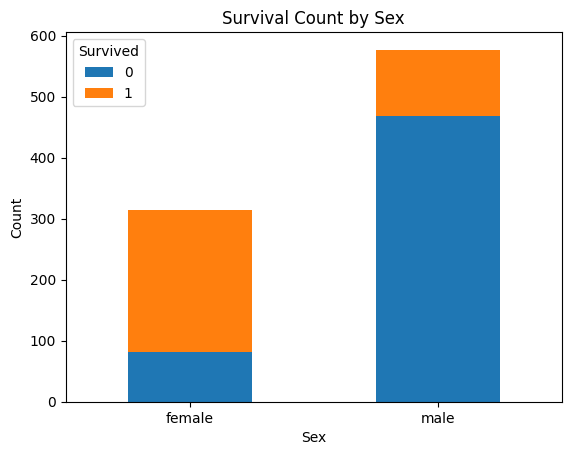

In [ ]:
#Now let's count the number of male and female that survived or not survived "Bar Plot"
survived_sex_counts = titanic.groupby(['Sex', 'Survived']).size().unstack()
survived_sex_counts.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.xticks(rotation=0)
plt.show()

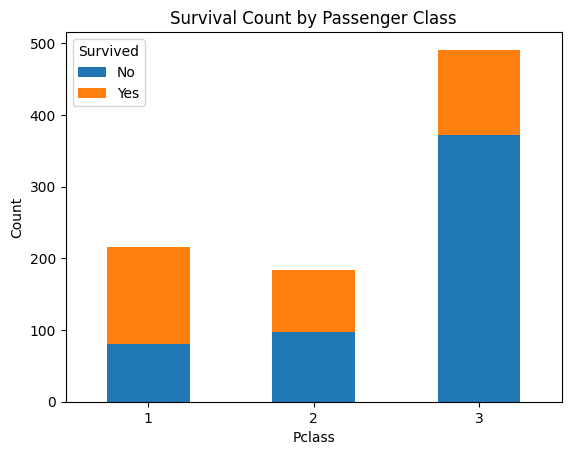

In [ ]:
#Now let's count the number of survived passenger along with their class
survived_pclass_counts = titanic.groupby(['Pclass', 'Survived']).size().unstack()
survived_pclass_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

Converting the Categorial columns into numeric values

In [ ]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#For Replacing the values let's perform the following code
titanic.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [ ]:
#As We can see the values are successfully replaced

**5. Now we find the Features and Targets accordingly and Separate them**

In [ ]:
X = titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1) #These are the Features
Y = titanic['Survived'] #This is the Target

**6. Now we can finally Split the data into Training and Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


**7. Here we Find that Logistic Regression Model is suitable and now we Train it**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

**8. Finally Now we Evaluate the Model using Accuracy Score**

In [ ]:
# Below Code is for the Accuracy Score on the Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 0.8117977528089888


In [ ]:
# Below Code is for the Accuracy Score on the Training Data
X_test_prediction = model.predict(X_test,)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


We Can conclude that the above program gives us the understanding 💡 about how we have performed the Data Analysis 📝 and Visualization 📈 . This Code uses Logistic Regression Model 📢 to predict the survival on the Titanic Dataset🚢. We have also used Accuracy score 🎯 for determning the Performance of the Model 🏃‍♀️.





